In [1]:
import tensorflow as tf
import numpy as np
import os
from astropy.io import fits
from astropy import stats
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

In [13]:
val_loss = np.load('first1valloss5.npy')
val_acc = np.load('first1vallacc5.npy')

validation_predicted = np.load('first1predict5.npy')
validation_labels = np.load('firstvalidationlabels.npy')

true_positive = []
true_negative = []
false_positive = []
false_negative = []

for i in range(len(validation_labels)):
    if validation_labels[i] == 0:
        if validation_predicted[i] == 0:
            true_positive.append(i)
        elif validation_predicted[i] == 1:
            false_negative.append(i)    
    if validation_labels[i] == 1:
        if validation_predicted[i] == 0:
            false_positive.append(i)
        elif validation_predicted[i] == 1:
            true_negative.append(i)  

agnrecall = len(true_positive)/(len(true_positive) + len(false_positive))
agnprecision = len(true_positive)/(len(true_positive) + len(false_negative))
agnf1 = 2*agnrecall*agnprecision/(agnrecall+agnprecision)

true_positive = []
true_negative = []
false_positive = []
false_negative = []

for i in range(len(validation_labels)):
    if validation_labels[i] == 0:
        if validation_predicted[i] == 0:
            true_negative.append(i)
        elif validation_predicted[i] == 1:
            false_positive.append(i)    
    if validation_labels[i] == 1:
        if validation_predicted[i] == 0:
            false_negative.append(i)
        elif validation_predicted[i] == 1:
            true_positive.append(i)  

psrecall = len(true_positive)/(len(true_positive) + len(false_positive))
psprecision = len(true_positive)/(len(true_positive) + len(false_negative))
psf1 = 2*psrecall*psprecision/(psrecall+psprecision)

In [14]:
print (val_acc[-1])
print (agnrecall)
print (agnprecision)
print (agnf1)
print (psrecall)
print (psprecision)
print (psf1)

0.92975205
0.8795180722891566
0.9125
0.8957055214723926
0.9559748427672956
0.9382716049382716
0.9470404984423676


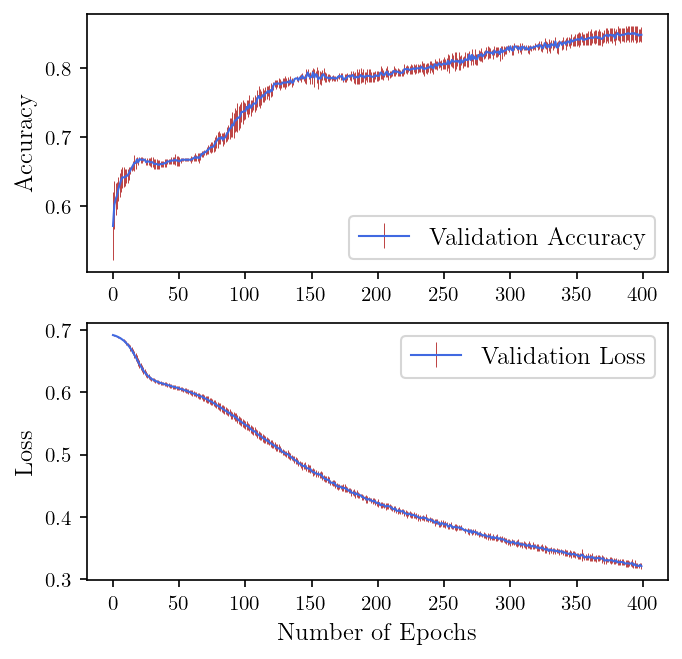

In [26]:
#VLASS
acc1 = np.load('vlassvalacc1.npy')
acc2 = np.load('vlassvalacc2.npy')
acc3 = np.load('vlassvalacc3.npy')
acc4 = np.load('vlassvalacc5.npy')

loss1 = np.load('vlassvalloss1.npy')
loss2 = np.load('vlassvalloss2.npy')
loss3 = np.load('vlassvalloss3.npy')
loss4 = np.load('vlassvalloss5.npy')

mean_accuracy = (acc1+acc2+acc3+acc4)/4
mean_loss = (loss1+loss2+loss3+loss4)/4

stddev_accuracy = np.sqrt(((acc1-mean_accuracy)**2 + (acc2-mean_accuracy)**2 + 
                          (acc3-mean_accuracy)**2 + (acc4-mean_accuracy)**2)/4)

stddev_loss = np.sqrt(((loss1 - mean_loss)**2 + (loss2- mean_loss)**2 + 
                          (loss3 - mean_loss)**2 + (loss4 - mean_loss)**2)/4)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

epochs = range(400)
plt.figure(figsize=(5,5),dpi=150)

plt.subplot(2,1,1)
plt.ylabel('Accuracy',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_accuracy, stddev_accuracy,label='Validation Accuracy',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='lower right',fontsize=12)

plt.subplot(2,1,2)
plt.xlabel('Number of Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_loss, stddev_loss,label='Validation Loss',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='upper right',fontsize=12)
plt.savefig('test')
plt.show()

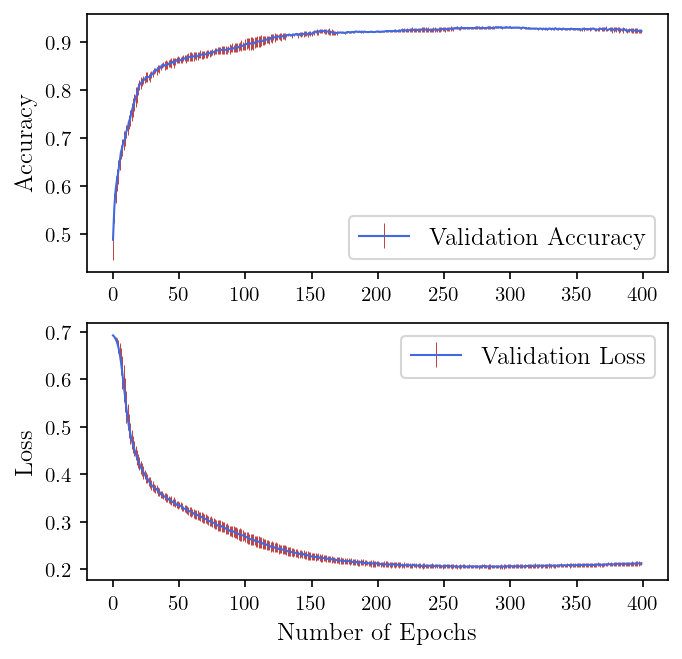

In [5]:
#FIRST
acc1 = np.load('first1vallacc1.npy')
acc2 = np.load('first1vallacc2.npy')
acc3 = np.load('first1vallacc3.npy')
acc4 = np.load('first1vallacc5.npy')

loss1 = np.load('first1valloss1.npy')
loss2 = np.load('first1valloss2.npy')
loss3 = np.load('first1valloss3.npy')
loss4 = np.load('first1valloss5.npy')

mean_accuracy = (acc1+acc2+acc3+acc4)/4
mean_loss = (loss1+loss2+loss3+loss4)/4

stddev_accuracy = np.sqrt(((acc1-mean_accuracy)**2 + (acc2-mean_accuracy)**2 + 
                          (acc3-mean_accuracy)**2 + (acc4-mean_accuracy)**2)/4)

stddev_loss = np.sqrt(((loss1 - mean_loss)**2 + (loss2- mean_loss)**2 + 
                          (loss3 - mean_loss)**2 + (loss4 - mean_loss)**2)/4)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

epochs = range(400)
plt.figure(figsize=(5,5),dpi=150)

plt.subplot(2,1,1)
plt.ylabel('Accuracy',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_accuracy, stddev_accuracy,label='Validation Accuracy',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='lower right',fontsize=12)

plt.subplot(2,1,2)
plt.xlabel('Number of Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_loss, stddev_loss,label='Validation Loss',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='upper right',fontsize=12)
plt.savefig('firsttrain')
plt.show()

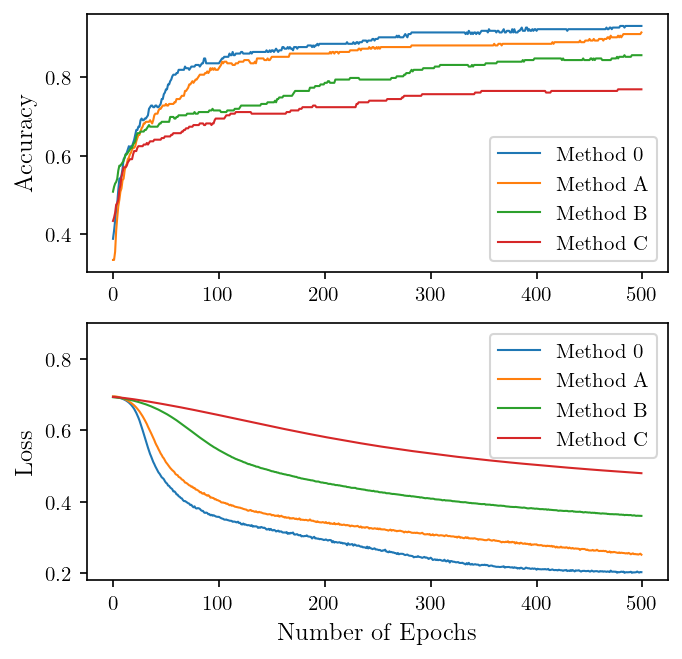

In [42]:
acc1 = np.load('transfervlassfirstvalacc1.npy')
acc2 = np.load('transfervlassfirstvalacc2.npy')
acc3 = np.load('transfervlassfirstvalacc3.npy')
acc4 = np.load('transfervlassfirstvalacc4.npy')

loss1 = np.load('transfervlassfirstvalloss1.npy')
loss2 = np.load('transfervlassfirstvalloss2.npy')
loss3 = np.load('transfervlassfirstvalloss3.npy')
loss4 = np.load('transfervlassfirstvalloss4.npy')

epochs = range(500)
plt.figure(figsize=(5,5),dpi=150)

plt.subplot(2,1,1)
plt.ylabel('Accuracy',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.plot(epochs, acc1, label = 'Method 0',linewidth=1)
plt.plot(epochs, acc2, label = 'Method A',linewidth=1)
plt.plot(epochs, acc3, label = 'Method B',linewidth=1)
plt.plot(epochs, acc4, label = 'Method C',linewidth=1)
plt.legend(loc='lower right',fontsize=10)

plt.subplot(2,1,2)
plt.xlabel('Number of Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.yticks(fontsize=10)
plt.ylim(0.18,0.9)
plt.xticks(fontsize=10)
plt.plot(epochs, loss1, label = 'Method 0',linewidth=1)
plt.plot(epochs, loss2, label = 'Method A',linewidth=1)
plt.plot(epochs, loss3, label = 'Method B',linewidth=1)
plt.plot(epochs, loss4, label = 'Method C',linewidth=1)
plt.legend(loc='upper right',fontsize=10)
plt.savefig('vlassfirsttrain')
plt.show()

0.92975205
0.91322315
0.8553719
0.76859504


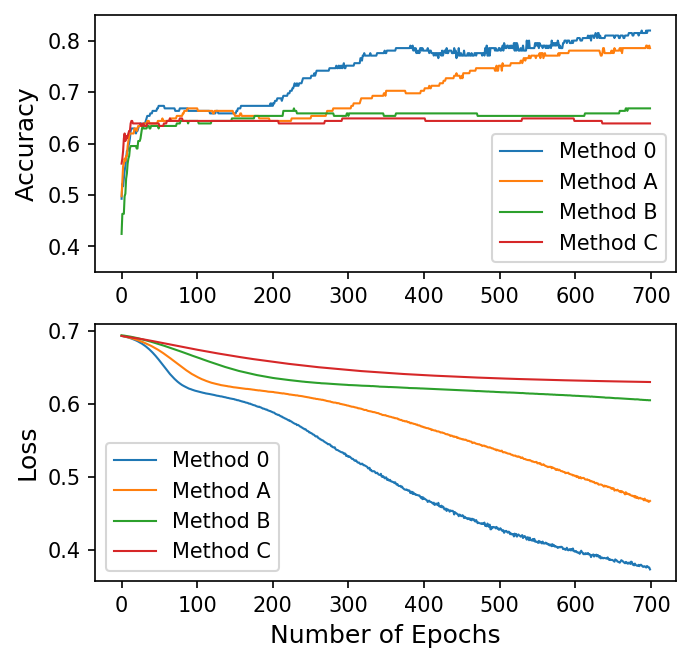

In [5]:
acc1 = np.load('transferfirstvlass1valacc1.npy')
acc2 = np.load('transferfirstvlassvalacc2.npy')
acc3 = np.load('transferfirstvlassvalacc3.npy')
acc4 = np.load('transferfirstvlassvalacc4.npy')

loss1 = np.load('transferfirstvlass1valloss1.npy')
loss2 = np.load('transferfirstvlassvalloss2.npy')
loss3 = np.load('transferfirstvlassvalloss3.npy')
loss4 = np.load('transferfirstvlassvalloss4.npy')

epochs = range(700)
plt.figure(figsize=(5,5),dpi=150)

plt.subplot(2,1,1)
plt.ylabel('Accuracy',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylim(0.35,0.85)
plt.plot(epochs, acc1, label = 'Method 0',linewidth=1)
plt.plot(epochs, acc2, label = 'Method A',linewidth=1)
plt.plot(epochs, acc3, label = 'Method B',linewidth=1)
plt.plot(epochs, acc4, label = 'Method C',linewidth=1)
plt.legend(loc='lower right',fontsize=10)

plt.subplot(2,1,2)
plt.xlabel('Number of Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.plot(epochs, loss1, label = 'Method 0',linewidth=1)
plt.plot(epochs, loss2, label = 'Method A',linewidth=1)
plt.plot(epochs, loss3, label = 'Method B',linewidth=1)
plt.plot(epochs, loss4, label = 'Method C',linewidth=1)
plt.legend(loc='lower left',fontsize=10)
plt.savefig('firstvlasstrain')
plt.show()

In [8]:
print (acc1[-1])
print (acc2[-1])
print (acc3[-1])
print (acc4[-1])

0.8195122
0.7853659
0.6682927
0.6390244


In [11]:
val_loss = np.load('transferfirstvlass1valloss3.npy')
val_acc = np.load('transferfirstvlass1valacc3.npy')

validation_predicted = np.load('transferfirstvlass1predict3.npy')
validation_labels = np.load('validation_labels.npy')

true_positive = []
true_negative = []
false_positive = []
false_negative = []

for i in range(len(validation_labels)):
    if validation_labels[i] == 0:
        if validation_predicted[i] == 0:
            true_positive.append(i)
        elif validation_predicted[i] == 1:
            false_negative.append(i)    
    if validation_labels[i] == 1:
        if validation_predicted[i] == 0:
            false_positive.append(i)
        elif validation_predicted[i] == 1:
            true_negative.append(i)  

agnrecall = len(true_positive)/(len(true_positive) + len(false_positive))
agnprecision = len(true_positive)/(len(true_positive) + len(false_negative))
agnf1 = 2*agnrecall*agnprecision/(agnrecall+agnprecision)

true_positive = []
true_negative = []
false_positive = []
false_negative = []

for i in range(len(validation_labels)):
    if validation_labels[i] == 0:
        if validation_predicted[i] == 0:
            true_negative.append(i)
        elif validation_predicted[i] == 1:
            false_positive.append(i)    
    if validation_labels[i] == 1:
        if validation_predicted[i] == 0:
            false_negative.append(i)
        elif validation_predicted[i] == 1:
            true_positive.append(i)  

psrecall = len(true_positive)/(len(true_positive) + len(false_positive))
psprecision = len(true_positive)/(len(true_positive) + len(false_negative))
psf1 = 2*psrecall*psprecision/(psrecall+psprecision)

In [12]:
print (val_acc[-1])
print (agnrecall)
print (agnprecision)
print (agnf1)
print (psrecall)
print (psprecision)
print (psf1)

0.82439023
0.7078651685393258
0.863013698630137
0.7777777777777778
0.9137931034482759
0.803030303030303
0.8548387096774194


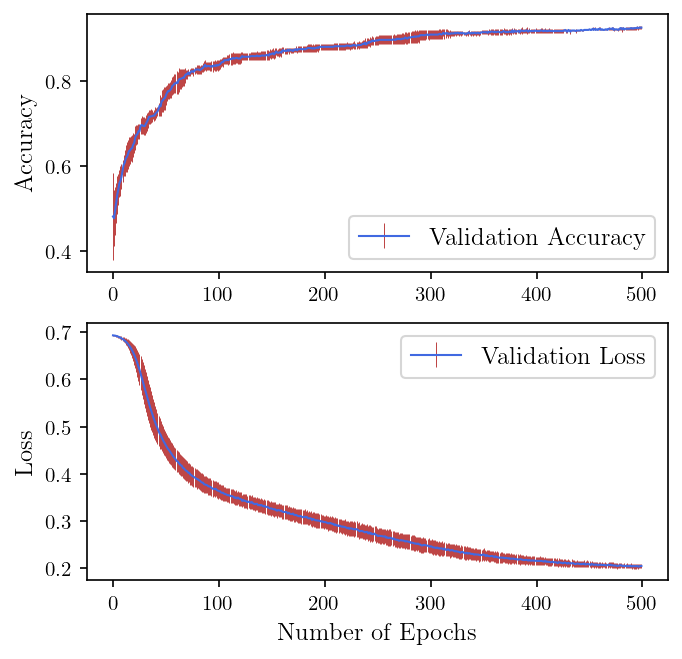

In [44]:
acc2 = np.load('transfervlassfirst1valacc1.npy')
acc3 = np.load('transfervlassfirst1valacc2.npy')
acc4 = np.load('transfervlassfirstvalacc1.npy')

loss2 = np.load('transfervlassfirst1valloss1.npy')
loss3 = np.load('transfervlassfirst1valloss2.npy')
loss4 = np.load('transfervlassfirstvalloss1.npy')

mean_accuracy = (acc2+acc3+acc4)/3
mean_loss = (loss2+loss3+loss4)/3

stddev_accuracy = np.sqrt(((acc2-mean_accuracy)**2 + 
                          (acc3-mean_accuracy)**2 + (acc4-mean_accuracy)**2)/3)

stddev_loss = np.sqrt(((loss2- mean_loss)**2 + 
                          (loss3 - mean_loss)**2 + (loss4 - mean_loss)**2)/3)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

epochs = range(500)
plt.figure(figsize=(5,5),dpi=150)

plt.subplot(2,1,1)
plt.ylabel('Accuracy',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_accuracy, stddev_accuracy,label='Validation Accuracy',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='lower right',fontsize=12)

plt.subplot(2,1,2)
plt.xlabel('Number of Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.errorbar(epochs, mean_loss, stddev_loss,label='Validation Loss',
             linewidth=1, elinewidth=0.4,color='royalblue', ecolor='firebrick')
plt.legend(loc='upper right',fontsize=12)
plt.savefig('vlassfirstfinal')
plt.show()